In [1]:
import requests
import talib
import pandas as pd
import numpy as np
from datetime import timedelta, datetime as dt

from matplotlib import ticker, style
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY, date2num
from matplotlib.finance import candlestick_ochl
from matplotlib import pyplot as plt, gridspec

from pylab import rcParams

from datetime import datetime as dt, timedelta

style.use('ggplot')

/usr/local/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [15]:
def get_data_yahoo(symbol, start, end):
    url = "https://query1.finance.yahoo.com/v7/finance/chart/{}?period1={:.0f}&period2={:.0f}"\
          "&interval=1d&indicators=quote&includeTimestamps=true&"\
          "events=div%7Csplit%7Cearn".format(symbol, start.timestamp(), end.timestamp())
        
    page = requests.get(url)
    result = page.json()['chart']['result']
    if not result:
        print(symbol, page.json())
        return
    
    data = result[0]
    quote = data['indicators']['quote'][0]
    if 'timestamp' not in data:
        print("Unexpected response for {}".format(symbol))
        return
    
    result = pd.DataFrame(
        index=pd.Index(data=[dt.fromtimestamp(t).date() for t in data['timestamp']], name="Date"),
        data=dict(
            open=quote["open"],
            high=quote["high"],
            low=quote["low"],
            close=quote["close"],
            volume=quote["volume"],
        )
    )   
    return result

date2 = dt.now()
date1 = date2 - timedelta(days=90)
df = get_data_yahoo('AAPL', date1, date2)
df[-5:]

,open,high,low,close,volume
Date,,,,,
2019-03-11,175.490005,179.119995,175.350006,178.899994,32011000
2019-03-12,180.000000,182.669998,179.369995,180.910004,32467600
2019-03-13,182.250000,183.300003,180.919998,181.710007,31032500
2019-03-14,183.899994,184.100006,182.559998,183.729996,23579500
2019-03-15,184.850006,187.330002,183.740005,186.119995,39025100


In [20]:
from stockstats import StockDataFrame
stock = StockDataFrame.retype(df)
stock["dmi_os"] = stock.pdi - stock.mdi
stock[['pdi', 'mdi', 'dmi_os']]

,pdi,mdi,dmi_os
Date,,,
2018-12-17,NaN,NaN,NaN
2018-12-18,0.000000,0.000000,0.000000
2018-12-19,0.000000,33.391198,-33.391198
2018-12-20,0.000000,40.510934,-40.510934
2018-12-21,0.000000,48.606814,-48.606814
2018-12-24,0.000000,50.840819,-50.840819
2018-12-26,16.426174,35.717459,-19.291285
2018-12-27,13.273419,28.862035,-15.588616
2018-12-28,16.461732,25.382929,-8.921197


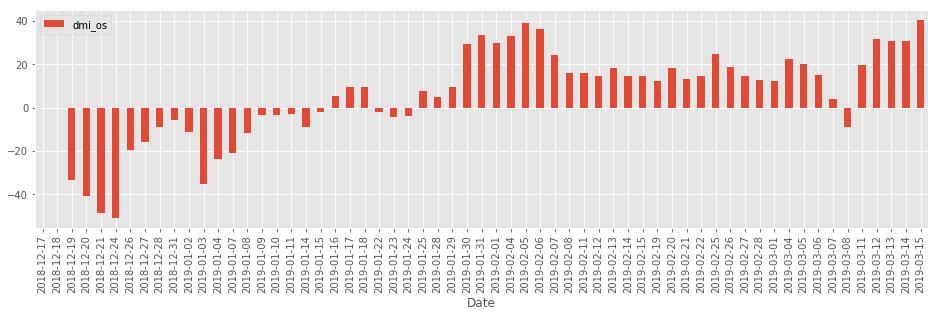

In [27]:
df[["dmi_os"]].plot(kind="bar", figsize=(16, 4))

In [19]:
# 1 UM/DM
hd = df["high"].diff()
df['um'] = (hd + hd.abs()) / 2

ld = - df["low"].diff()
df['dm'] = (ld + ld.abs()) / 2

# PDM
df['pdm'] = np.where(df['um'] > df['dm'], df['um'], 0)
df['pdm_14_ema'] = df["pdm"].ewm(ignore_na=False, span=14, min_periods=0, adjust=True).mean()

# MDM 
df['mdm'] = np.where(df['dm'] > df['um'], df['dm'], 0)
df["mdm_14_ema"] = df["mdm"].ewm(ignore_na=False, span=14, min_periods=0, adjust=True).mean()

# TR
prev_close = df["close"].shift(1)
c1 = df['high'] - df['low']
c2 = np.abs(df['high'] - prev_close)
c3 = np.abs(df['low'] - prev_close)
df['tr'] = np.max((c1, c2, c3), axis=0)

# ATR
df["art_14"] = df["tr_14_smma"] = df["tr"].ewm(ignore_na=False, alpha=1.0 / 14, min_periods=0, adjust=True).mean()

In [ ]:

df['pdi'] = df["pdm_14"] / df["atr_14"] * 100
df['mdi'] = df["mdm_14"] / df["atr_14"] * 100
df['dx'] = abs(df["pdi_14"] - df["mdi_14"]) / (df["pdi_14"] + df["mdi_14"]) * 100
df['adx'] = df['dx_6_ema']
df['adxr'] = df['adx_6_ema']

In [13]:
from stockstats import StockDataFrame
stock = StockDataFrame.retype(df)

df["macd"] = stock['macd']
df

,close,high,low,open,volume,close_12_ema,close_26_ema,macd,macds,macdh
Date,,,,,,,,,,
2018-12-06,174.720001,174.779999,170.419998,171.759995,43098400,174.720001,174.720001,0.000000,0.000000,0.000000
2018-12-07,168.490005,174.490005,168.300003,173.490005,42281600,171.345420,171.485196,-0.139776,-0.077653,-0.124245
2018-12-10,169.600006,170.089996,163.330002,165.000000,62026000,170.664185,170.807865,-0.143681,-0.104714,-0.077934
2018-12-11,168.630005,171.789993,167.000000,171.660004,47281700,170.022074,170.199031,-0.176957,-0.129186,-0.095542
2018-12-12,169.100006,171.919998,169.020004,170.399994,35627700,169.771551,169.944162,-0.172611,-0.142104,-0.061014
2018-12-13,170.949997,172.570007,169.550003,170.490005,31898600,170.057975,170.145623,-0.087648,-0.127343,0.079392
2018-12-14,165.479996,169.080002,165.279999,169.000000,40703700,169.036415,169.315865,-0.279450,-0.165838,-0.227225
2018-12-17,163.940002,168.350006,162.729996,165.449997,44287900,167.972873,168.449681,-0.476808,-0.240570,-0.472477
2018-12-18,166.070007,167.529999,164.389999,165.380005,33841500,167.596418,168.096961,-0.500543,-0.300625,-0.399836
